# RedFin Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv('redfin_data.csv')
df.head()

,PROPERTY TYPE,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,Single Family Residential,Seattle,WA,98199,1395000,4.0,3.50,3190.0,3500.0,2006.0,1,437.0,241.0,N,Y,47.648096,-122.385676
1,Condo/Co-op,Seattle,WA,98121,668000,1.0,0.75,790.0,7576.5,2009.0,3,846.0,622.0,N,Y,47.618102,-122.339216
2,Condo/Co-op,Seattle,WA,98121,918000,1.0,1.00,792.0,83673.0,2016.0,3,1159.0,649.0,N,Y,47.617046,-122.343728
3,Condo/Co-op,Bothell,WA,98011,297950,2.0,1.50,970.0,46440.0,1976.0,3,307.0,265.0,N,Y,47.765949,-122.207792
4,Single Family Residential,Bellevue,WA,98006,888000,3.0,1.75,2010.0,7890.0,1976.0,4,442.0,241.0,N,Y,47.558436,-122.137775


In [3]:
df.dtypes

PROPERTY TYPE          object
CITY                   object
STATE OR PROVINCE      object
ZIP OR POSTAL CODE     object
PRICE                   int64
BEDS                  float64
BATHS                 float64
SQUARE FEET           float64
LOT SIZE              float64
YEAR BUILT            float64
DAYS ON MARKET          int64
$/SQUARE FEET         float64
HOA/MONTH             float64
FAVORITE               object
INTERESTED             object
LATITUDE              float64
LONGITUDE             float64
dtype: object

In [4]:
df_num = df.select_dtypes(include=['number']).copy()
df_num.head()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
0,1395000,4.0,3.50,3190.0,3500.0,2006.0,1,437.0,241.0,47.648096,-122.385676
1,668000,1.0,0.75,790.0,7576.5,2009.0,3,846.0,622.0,47.618102,-122.339216
2,918000,1.0,1.00,792.0,83673.0,2016.0,3,1159.0,649.0,47.617046,-122.343728
3,297950,2.0,1.50,970.0,46440.0,1976.0,3,307.0,265.0,47.765949,-122.207792
4,888000,3.0,1.75,2010.0,7890.0,1976.0,4,442.0,241.0,47.558436,-122.137775


In [5]:
df_num.isna().sum()

PRICE             0
BEDS              0
BATHS             0
SQUARE FEET       0
LOT SIZE          0
YEAR BUILT        4
DAYS ON MARKET    0
$/SQUARE FEET     4
HOA/MONTH         0
LATITUDE          0
LONGITUDE         0
dtype: int64

In [6]:
df_num['YEAR BUILT'] = df['YEAR BUILT'].fillna(df['YEAR BUILT'].median())
df_num['$/SQUARE FEET'] = df['$/SQUARE FEET'].fillna(df['$/SQUARE FEET'].median())
df_num.isna().sum()

PRICE             0
BEDS              0
BATHS             0
SQUARE FEET       0
LOT SIZE          0
YEAR BUILT        0
DAYS ON MARKET    0
$/SQUARE FEET     0
HOA/MONTH         0
LATITUDE          0
LONGITUDE         0
dtype: int64

In [7]:
df_num.to_csv('num_redfin_data.csv', index=False)

In [8]:
df_num.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
count,3.500000e+03,3500.000000,3500.000000,3500.000000,3.500000e+03,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,6.274214e+05,3.152571,2.366014,1972.407143,2.926234e+04,1976.234286,6.720286,331.772000,270.196857,36.589972,-108.280406
std,6.996896e+05,1.371173,1.975114,1105.106899,1.847176e+05,32.304929,18.200364,229.560441,247.029711,6.771645,14.839055
min,1.200000e+03,0.000000,0.750000,30.000000,1.000000e+00,1880.000000,1.000000,3.000000,0.000000,25.553920,-122.880088
25%,2.600000e+05,2.000000,2.000000,1248.000000,5.283500e+03,1956.000000,1.000000,164.750000,229.750000,32.751244,-122.195901
50%,4.500000e+05,3.000000,2.000000,1712.000000,7.576500e+03,1980.000000,3.000000,270.000000,241.000000,35.138292,-116.133957
75%,7.490000e+05,4.000000,3.000000,2384.000000,1.026500e+04,2004.000000,4.000000,446.000000,258.500000,43.370063,-96.794496
max,1.599500e+07,20.000000,100.000000,11695.000000,6.075313e+06,2020.000000,276.000000,2254.000000,5661.000000,47.814656,-80.162388


/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


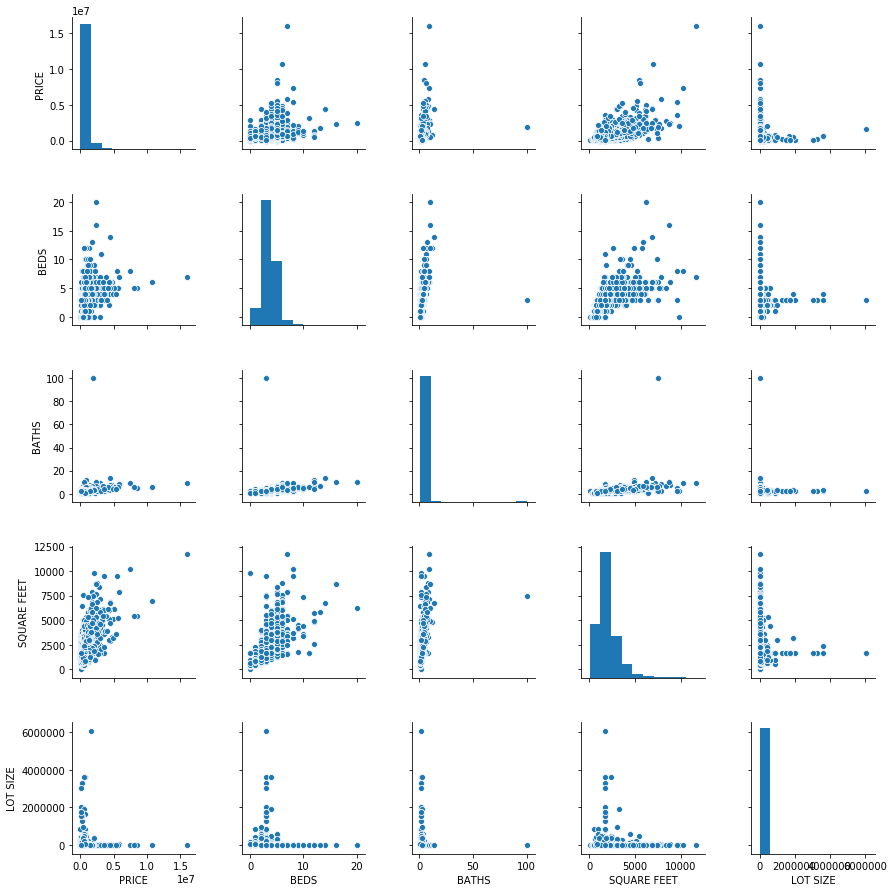

In [9]:
cols = ['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']

sns.pairplot(df_num[cols], size=2.5)
plt.tight_layout()
plt.show()

/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


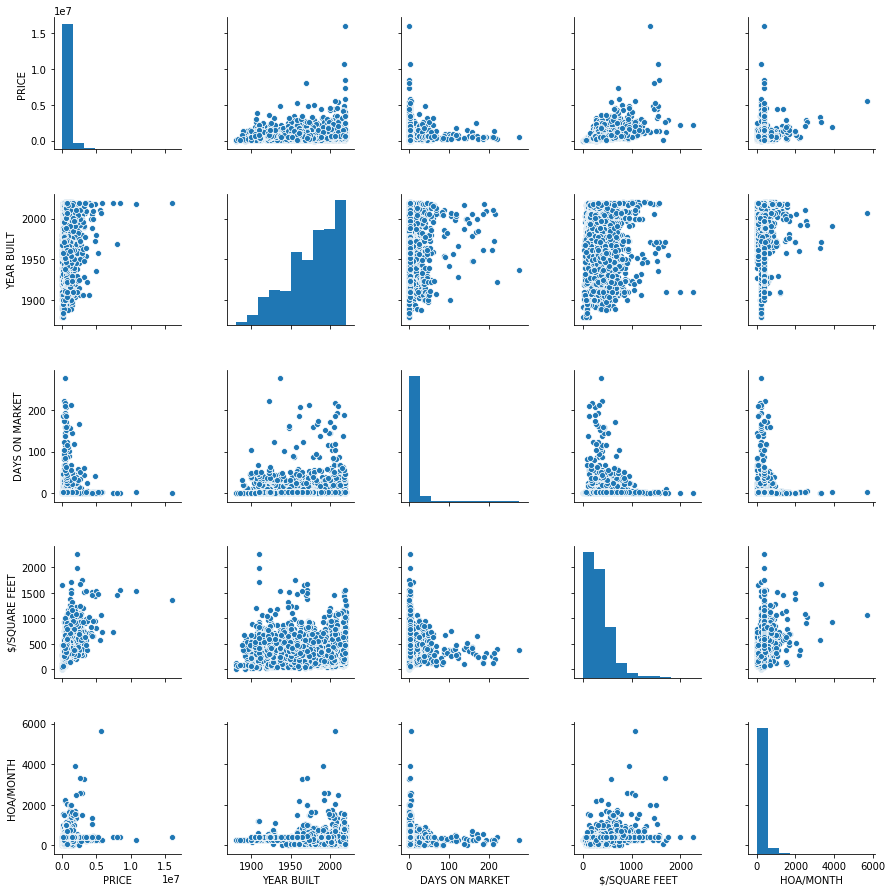

In [10]:
cols = ['PRICE', 'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH']

sns.pairplot(df_num[cols], size=2.5)
plt.tight_layout()
plt.show()

/Users/sammylee/miniconda3/envs/datascience/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


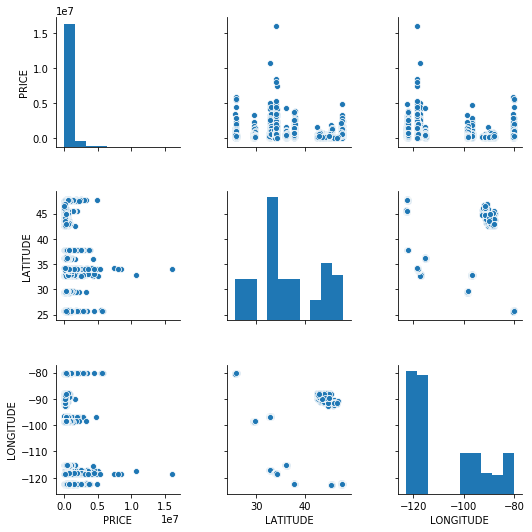

In [11]:
cols = ['PRICE', 'LATITUDE', 'LONGITUDE']

sns.pairplot(df_num[cols], size=2.5)
plt.tight_layout()
plt.show()

### BASELINE LINEAR REGRESSION MODEL using Numerical Variables only:

In [12]:
df_num.columns

Index(['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT',
       'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

cols = ['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT',
       'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'LATITUDE',
       'LONGITUDE']

X = df_num[cols].values
y = df_num['PRICE'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

Test set score: 0.76
RMSE: 358373.09


In [14]:
df = pd.read_csv('redfin_data.csv')
df.head()

,PROPERTY TYPE,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,Single Family Residential,Seattle,WA,98199,1395000,4.0,3.50,3190.0,3500.0,2006.0,1,437.0,241.0,N,Y,47.648096,-122.385676
1,Condo/Co-op,Seattle,WA,98121,668000,1.0,0.75,790.0,7576.5,2009.0,3,846.0,622.0,N,Y,47.618102,-122.339216
2,Condo/Co-op,Seattle,WA,98121,918000,1.0,1.00,792.0,83673.0,2016.0,3,1159.0,649.0,N,Y,47.617046,-122.343728
3,Condo/Co-op,Bothell,WA,98011,297950,2.0,1.50,970.0,46440.0,1976.0,3,307.0,265.0,N,Y,47.765949,-122.207792
4,Single Family Residential,Bellevue,WA,98006,888000,3.0,1.75,2010.0,7890.0,1976.0,4,442.0,241.0,N,Y,47.558436,-122.137775


In [15]:
df.dtypes

PROPERTY TYPE          object
CITY                   object
STATE OR PROVINCE      object
ZIP OR POSTAL CODE     object
PRICE                   int64
BEDS                  float64
BATHS                 float64
SQUARE FEET           float64
LOT SIZE              float64
YEAR BUILT            float64
DAYS ON MARKET          int64
$/SQUARE FEET         float64
HOA/MONTH             float64
FAVORITE               object
INTERESTED             object
LATITUDE              float64
LONGITUDE             float64
dtype: object

In [16]:
df['PROPERTY TYPE'].value_counts()

Single Family Residential    2284
Condo/Co-op                   691
Townhouse                     207
Vacant Land                   155
Multi-Family (2-4 Unit)       132
Multi-Family (5+ Unit)         17
Mobile/Manufactured Home       12
Moorage                         1
Other                           1
Name: PROPERTY TYPE, dtype: int64

In [17]:
# Categorically Encode 'PROPERTY TYPE'

property_types = []

for row in df['PROPERTY TYPE']:
    if row == "Single Family Residential":
        property_types.append(4)
    elif row == "Condo/Co-op":
        property_types.append(3)
    elif row == "Townhouse":
        property_types.append(2)
    elif row == "Vacant Land":
        property_types.append(1)
    else:
        property_types.append(0)
        
df['PROPERTY TYPES'] = property_types

In [18]:
df['PROPERTY TYPES'].unique()

array([4, 3, 2, 0, 1])

In [19]:
df.head()

,PROPERTY TYPE,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,PROPERTY TYPES
0,Single Family Residential,Seattle,WA,98199,1395000,4.0,3.50,3190.0,3500.0,2006.0,1,437.0,241.0,N,Y,47.648096,-122.385676,4
1,Condo/Co-op,Seattle,WA,98121,668000,1.0,0.75,790.0,7576.5,2009.0,3,846.0,622.0,N,Y,47.618102,-122.339216,3
2,Condo/Co-op,Seattle,WA,98121,918000,1.0,1.00,792.0,83673.0,2016.0,3,1159.0,649.0,N,Y,47.617046,-122.343728,3
3,Condo/Co-op,Bothell,WA,98011,297950,2.0,1.50,970.0,46440.0,1976.0,3,307.0,265.0,N,Y,47.765949,-122.207792,3
4,Single Family Residential,Bellevue,WA,98006,888000,3.0,1.75,2010.0,7890.0,1976.0,4,442.0,241.0,N,Y,47.558436,-122.137775,4


In [20]:
df_num = df.select_dtypes(include=['number']).copy()
df_num.head()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,PROPERTY TYPES
0,1395000,4.0,3.50,3190.0,3500.0,2006.0,1,437.0,241.0,47.648096,-122.385676,4
1,668000,1.0,0.75,790.0,7576.5,2009.0,3,846.0,622.0,47.618102,-122.339216,3
2,918000,1.0,1.00,792.0,83673.0,2016.0,3,1159.0,649.0,47.617046,-122.343728,3
3,297950,2.0,1.50,970.0,46440.0,1976.0,3,307.0,265.0,47.765949,-122.207792,3
4,888000,3.0,1.75,2010.0,7890.0,1976.0,4,442.0,241.0,47.558436,-122.137775,4


In [21]:
df_num.isna().sum()

PRICE             0
BEDS              0
BATHS             0
SQUARE FEET       0
LOT SIZE          0
YEAR BUILT        4
DAYS ON MARKET    0
$/SQUARE FEET     4
HOA/MONTH         0
LATITUDE          0
LONGITUDE         0
PROPERTY TYPES    0
dtype: int64

In [22]:
df_num['YEAR BUILT'] = df_num['YEAR BUILT'].fillna(df_num['YEAR BUILT'].median())
df_num['$/SQUARE FEET'] = df_num['$/SQUARE FEET'].fillna(df_num['$/SQUARE FEET'].median())
df_num.isna().sum()

PRICE             0
BEDS              0
BATHS             0
SQUARE FEET       0
LOT SIZE          0
YEAR BUILT        0
DAYS ON MARKET    0
$/SQUARE FEET     0
HOA/MONTH         0
LATITUDE          0
LONGITUDE         0
PROPERTY TYPES    0
dtype: int64

In [23]:
df_num.to_csv('num_redfin_data.csv', index=False)

### BASELINE MODEL WITH ONE EXTRA CATEGORICAL ENCODED VARIABLE:

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

cols = ['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT',
       'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'LATITUDE',
       'LONGITUDE', 'PROPERTY TYPES']

X = df_num[cols].values
y = df_num['PRICE'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

Test set score: 0.76
RMSE: 356174.14


### MICRO FEATURE ENGINEERING:

In [25]:
# create 'PROPERTY AGE' variable

df_num['PROPERTY AGE'] = 2019.0 - df_num['YEAR BUILT']
df_num.head()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,PROPERTY TYPES,PROPERTY AGE
0,1395000,4.0,3.50,3190.0,3500.0,2006.0,1,437.0,241.0,47.648096,-122.385676,4,13.0
1,668000,1.0,0.75,790.0,7576.5,2009.0,3,846.0,622.0,47.618102,-122.339216,3,10.0
2,918000,1.0,1.00,792.0,83673.0,2016.0,3,1159.0,649.0,47.617046,-122.343728,3,3.0
3,297950,2.0,1.50,970.0,46440.0,1976.0,3,307.0,265.0,47.765949,-122.207792,3,43.0
4,888000,3.0,1.75,2010.0,7890.0,1976.0,4,442.0,241.0,47.558436,-122.137775,4,43.0


In [26]:
# create 'LONG_LAT' interaction variable

df_num['LONG_LAT'] = df_num['LATITUDE'] * df_num['LONGITUDE']
df_num.head()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,PROPERTY TYPES,PROPERTY AGE,LONG_LAT
0,1395000,4.0,3.50,3190.0,3500.0,2006.0,1,437.0,241.0,47.648096,-122.385676,4,13.0,-5831.444502
1,668000,1.0,0.75,790.0,7576.5,2009.0,3,846.0,622.0,47.618102,-122.339216,3,10.0,-5825.561246
2,918000,1.0,1.00,792.0,83673.0,2016.0,3,1159.0,649.0,47.617046,-122.343728,3,3.0,-5825.646970
3,297950,2.0,1.50,970.0,46440.0,1976.0,3,307.0,265.0,47.765949,-122.207792,3,43.0,-5837.371160
4,888000,3.0,1.75,2010.0,7890.0,1976.0,4,442.0,241.0,47.558436,-122.137775,4,43.0,-5808.681524


In [27]:
df_num['PRICE_LOG'] = np.log(df_num['PRICE'])
df_num.head()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,PROPERTY TYPES,PROPERTY AGE,LONG_LAT,PRICE_LOG
0,1395000,4.0,3.50,3190.0,3500.0,2006.0,1,437.0,241.0,47.648096,-122.385676,4,13.0,-5831.444502,14.148405
1,668000,1.0,0.75,790.0,7576.5,2009.0,3,846.0,622.0,47.618102,-122.339216,3,10.0,-5825.561246,13.412043
2,918000,1.0,1.00,792.0,83673.0,2016.0,3,1159.0,649.0,47.617046,-122.343728,3,3.0,-5825.646970,13.729953
3,297950,2.0,1.50,970.0,46440.0,1976.0,3,307.0,265.0,47.765949,-122.207792,3,43.0,-5837.371160,12.604681
4,888000,3.0,1.75,2010.0,7890.0,1976.0,4,442.0,241.0,47.558436,-122.137775,4,43.0,-5808.681524,13.696727


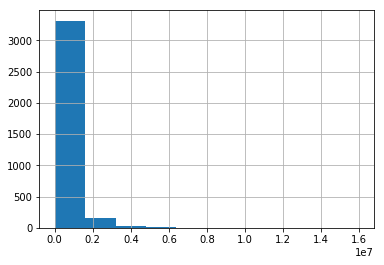

In [28]:
df_num['PRICE'].hist()

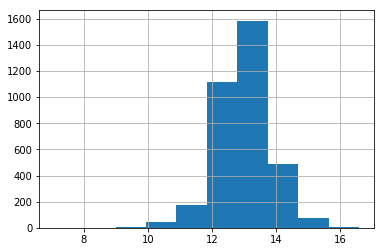

In [29]:
df_num['PRICE_LOG'].hist()

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

cols = ['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT',
       'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'LATITUDE',
       'LONGITUDE', 'PROPERTY TYPES', 'PROPERTY AGE', 'LONG_LAT']

X = df_num[cols].values
y = df_num['PRICE_LOG'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

Test set score: 0.74
RMSE: 0.45


### Without Logged Price:

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

cols = ['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT',
       'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'LATITUDE',
       'LONGITUDE', 'PROPERTY TYPES', 'PROPERTY AGE', 'LONG_LAT']

X = df_num[cols].values
y = df_num['PRICE'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression()
model = lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Test set score: {:.2f}".format(model.score(X_test, y_test)))
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

Test set score: 0.76
RMSE: 356173.74


### Truncated Model Gives the same score:

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

cols = ['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', '$/SQUARE FEET', 'HOA/MONTH', 'PROPERTY TYPES', 'PROPERTY AGE']

X = df_num[cols].values
y = df_num['PRICE'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression()
model = lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Test set score: {:.2f}".format(model.score(X_test, y_test)))
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

Test set score: 0.76
RMSE: 357680.53


### Using RandomForestRegressor which can deal with non-Linear relationships between variables better:

In [33]:

# Lucky number 7 
cols = ['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', '$/SQUARE FEET', 'HOA/MONTH', 'PROPERTY TYPES', 'PROPERTY AGE']

X = df_num[cols].values
y = df_num['PRICE'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(max_depth=7, random_state=42, n_estimators=100)

rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

print("Test set score: {:.2f}".format(rf_reg.score(X_test, y_test)))
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

Test set score: 0.94
RMSE: 175803.73


In [34]:
df_num['PRICE'].describe()

count    3.500000e+03
mean     6.274214e+05
std      6.996896e+05
min      1.200000e+03
25%      2.600000e+05
50%      4.500000e+05
75%      7.490000e+05
max      1.599500e+07
Name: PRICE, dtype: float64

### Let's get rid of Outliers:

In [35]:
from scipy import stats

df_num_no_outliers = df_num[(np.abs(stats.zscore(df_num)) < 3).all(axis=1)]

df_num_no_outliers.head()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,PROPERTY TYPES,PROPERTY AGE,LONG_LAT,PRICE_LOG
0,1395000,4.0,3.50,3190.0,3500.0,2006.0,1,437.0,241.0,47.648096,-122.385676,4,13.0,-5831.444502,14.148405
1,668000,1.0,0.75,790.0,7576.5,2009.0,3,846.0,622.0,47.618102,-122.339216,3,10.0,-5825.561246,13.412043
3,297950,2.0,1.50,970.0,46440.0,1976.0,3,307.0,265.0,47.765949,-122.207792,3,43.0,-5837.371160,12.604681
4,888000,3.0,1.75,2010.0,7890.0,1976.0,4,442.0,241.0,47.558436,-122.137775,4,43.0,-5808.681524,13.696727
5,849000,4.0,2.50,1834.0,125538.0,2012.0,4,463.0,300.0,47.538910,-122.161376,2,7.0,-5807.418684,13.651814


In [36]:
df_num_no_outliers.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,PROPERTY TYPES,PROPERTY AGE,LONG_LAT,PRICE_LOG
count,3.112000e+03,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000
mean,5.373380e+05,3.027314,2.236681,1863.008676,17377.131427,1977.408098,5.037596,312.747108,246.532455,36.552906,-108.178824,3.549807,41.591902,-4007.876005,12.939843
std,4.064813e+05,1.126331,0.888205,895.429814,44841.527656,31.531730,8.978252,191.402037,152.638183,6.784982,14.781197,0.786474,31.531730,1098.146619,0.735067
min,3.490000e+04,0.000000,0.750000,318.000000,1.000000,1880.000000,1.000000,28.000000,0.000000,25.553920,-122.880088,1.000000,-1.000000,-5851.491243,10.460242
25%,2.550000e+05,2.000000,1.750000,1220.750000,5227.000000,1957.000000,1.000000,160.000000,195.000000,32.741851,-122.196066,3.000000,15.000000,-4621.114117,12.449019
50%,4.250000e+05,3.000000,2.000000,1700.000000,7576.500000,1980.000000,3.000000,270.000000,241.000000,35.997898,-115.300653,4.000000,39.000000,-4023.747356,12.959844
75%,6.890000e+05,4.000000,2.750000,2297.000000,10018.000000,2004.000000,4.000000,435.000000,241.000000,43.553047,-96.798867,4.000000,62.000000,-3175.796765,13.442997
max,2.700000e+06,7.000000,6.500000,5241.000000,509464.000000,2020.000000,60.000000,1019.000000,1009.000000,47.814656,-80.164182,4.000000,139.000000,-2053.852904,14.808762


In [37]:
df_num_no_outliers.dtypes

PRICE               int64
BEDS              float64
BATHS             float64
SQUARE FEET       float64
LOT SIZE          float64
YEAR BUILT        float64
DAYS ON MARKET      int64
$/SQUARE FEET     float64
HOA/MONTH         float64
LATITUDE          float64
LONGITUDE         float64
PROPERTY TYPES      int64
PROPERTY AGE      float64
LONG_LAT          float64
PRICE_LOG         float64
dtype: object

### A Truncated LinearRegression Model with some Feature Engineering and No Outliers:

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

cols = ['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', '$/SQUARE FEET', 'HOA/MONTH', 'PROPERTY TYPES', 'PROPERTY AGE']

X = df_num_no_outliers[cols].values
y = df_num_no_outliers['PRICE'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression()
model = lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Test set score: {:.2f}".format(model.score(X_test, y_test)))
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

Test set score: 0.81
RMSE: 175445.42


### Best Results achieved with RandomForestRegressor Using Data that's been preprocessed and feature-engineered:

In [39]:
# Lucky number 7 
cols = ['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', '$/SQUARE FEET', 'HOA/MONTH', 'PROPERTY TYPES', 'PROPERTY AGE']

X = df_num_no_outliers[cols].values
y = df_num_no_outliers['PRICE'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(max_depth=7, random_state=42, n_estimators=100)

rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

print("Test set score: {:.2f}".format(rf_reg.score(X_test, y_test)))
print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

Test set score: 0.97
RMSE: 72548.42


In [40]:
rf_reg_final_model = rf_reg.fit(X, y)

In [41]:
rf_reg_final_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

### Pickle the Regressor: Model Persistence

In [42]:
import os
import pickle


In [43]:
dest = os.path.join('housing_regressor', 'pkl_objects')


In [44]:
dest

'housing_regressor/pkl_objects'

In [45]:
pwd

'/Users/sammylee/Desktop'

In [46]:
if not os.path.exists(dest):
    os.makedirs(dest)


In [47]:
pickle.dump(rf_reg_final_model,
           open(os.path.join(dest, 'regressor.pkl'), 'wb'),
           protocol=4)

In [49]:
"""
To verify that this 'regressor' pickle object exists, close the terminal and start a new one.  
Head over the the 'housing_regressor' directory:

import os
import pickle

regressor = pickle.load(open(
    os.path.join('pkl_objects',
                'regressor.pkl'), 'rb'))

regressor

regressor.predict([[3.0, 2.0, 1700.0, 7576.5, 1980.0, 270.0, 241.0, 4, 39.0]]) 
"""

# Output: array([328198.78918777])



"\nTo verify that this 'regressor' pickle object exists, close the terminal and start a new one.  \nHead over the the 'housing_regressor' directory:\n\nimport os\nimport pickle\n\nregressor = pickle.load(open(\n    os.path.join('pkl_objects',\n                'regressor.pkl'), 'rb'))\n\nregressor\n\nregressor.predict([[3.0, 2.0, 1700.0, 7576.5, 1980.0, 270.0, 241.0, 4, 39.0]]) \n"